# Predicting Heart disease using Machine Learning
This notebook looks into using various Python-based Machine Learning and Data Science libraries in an attempt to build a Machine Learning Model capable of predicting whether or not someone has heart disease based on their medical attributes (features/columns)

 we'll look at the following topics.

+ **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
+ **Model training** - create model(s) to learn to predict a target variable based on other variables.
+ **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
+ **Model comparison** - comparing several different models to find the best one.
+ **Model fine-tuning** - once we've found a good model, how can we improve it?
+ **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
+ **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
Reporting what we've found - if we had to present our work, what would we show someone?


We're going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

### 1. Problem Defination
In Statement,
> Given clinical parameters about patients, can we predict whether they have heart disease or not?

### 2. Data
Data came from internet.
> https://archive.ics.uci.edu/ml/datasets/heart+Disease                             
> https://www.kaggle.com/ronitf/heart-disease-uci/

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during a proof of concept, we will persue the project

### 4.Features
+ This where we get different information about features in our data                             
+ A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.            

**Create a dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
+ 0: Typical angina: chest pain related decrease blood supply to the heart
+ 1: Atypical angina: chest pain not related to heart
+ 2: Non-anginal pain: typically esophageal spasms (non heart related)
+ 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
+ anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
    + can range from mild symptoms to severe problems
    + signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
    + Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use Numpy, Pandas, Matplotlib, Seaborn for Data Analysis, Manipulation & Visualization

Scikit-learn Library for modeling & evaluation

In [1]:
# Regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA (Exploratory Data Analysis)
The goal here is to find out more about the data & become subjcet matter expert on the dataset you have
1. what question(s) are you trying to solve?
2. what kind of data do we have & how do we treat different types?
3. What's missing from the data & how you deal with it?
4. Where are the outliers & why should you care about them?
5. How can you add, change & remove features to get more out of your data?


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

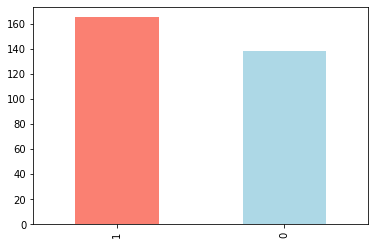

In [10]:
df.target.value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
for cols in df.columns:
    print(f'Name of Column: {cols}')
    print(df[cols].value_counts())
    print('---'*20)

Name of Column: age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
------------------------------------------------------------
Name of Column: sex
1    207
0     96
Name: sex, dtype: int64
------------------------------------------------------------
Name of Column: cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
------------------------------------------------------------
Name of Column: trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3

### Heart disease Frequency According to SEX

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='target'>

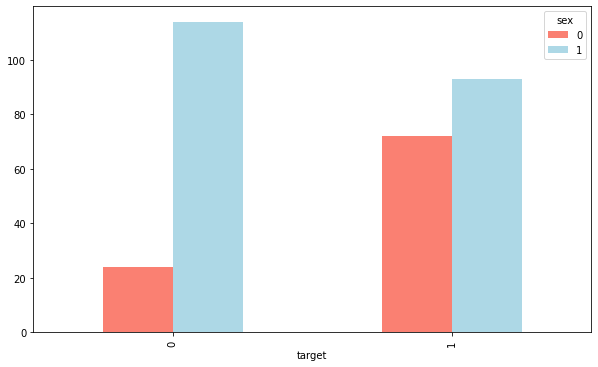

In [16]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6), color=['salmon','lightblue'])


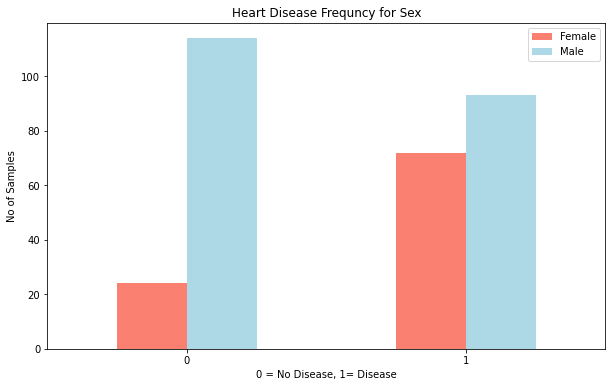

In [17]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6), color=['salmon','lightblue'])
plt.title('Heart Disease Frequncy for Sex')
plt.xlabel('0 = No Disease, 1= Disease')
plt.ylabel('No of Samples')
plt.legend(['Female' , 'Male'])
plt.xticks(rotation=0);

### Age vs Max heart rate  for Heart Disease

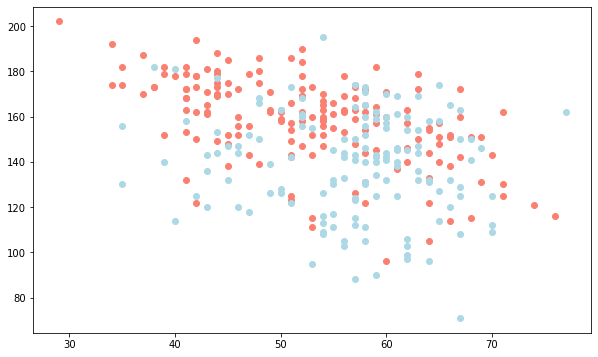

In [18]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df['age'][df['target']==1], df.thalach[df.target==1],c='salmon')


# scatter with negative example
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')

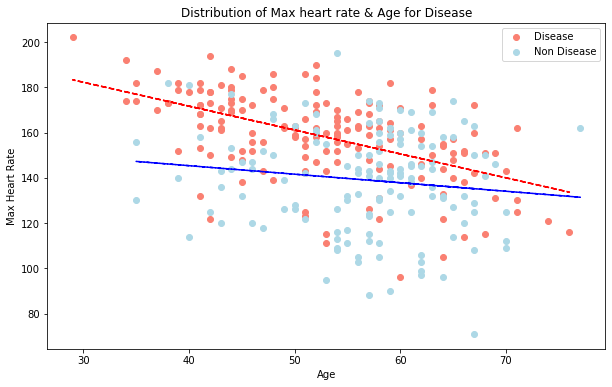

In [19]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df['age'][df['target']==1], df.thalach[df.target==1],c='salmon',label='Disease')
z = np.polyfit(df['age'][df['target']==1], df.thalach[df.target==1],1)
p = np.poly1d(z)
plt.plot(df['age'][df['target']==1],p(df['age'][df['target']==1]),'r--')


# scatter with negative example
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue', label='Non Disease')
x = np.polyfit(df.age[df.target==0],df.thalach[df.target==0],1)
y = np.poly1d(x)
plt.plot(df.age[df.target==0],y(df.age[df.target==0]),'b--')
plt.legend()
plt.title('Distribution of Max heart rate & Age for Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

<AxesSubplot:>

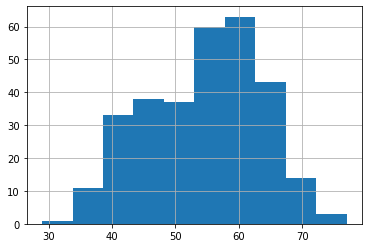

In [20]:
# check the distribution with histogram
df.age.hist()

<AxesSubplot:>

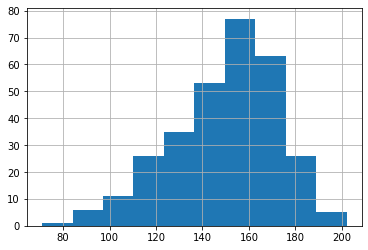

In [21]:
df.thalach.hist()

<AxesSubplot:>

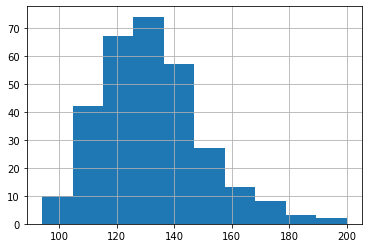

In [22]:
df.trestbps.hist()

<AxesSubplot:>

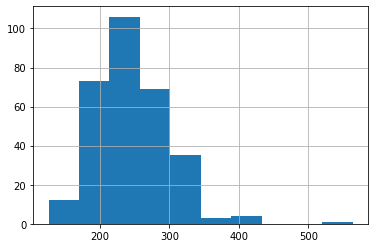

In [23]:
df.chol.hist()

### Heart Disease frequecy with chest pain type
* cp - chest pain type
> 0: Typical angina: chest pain related decrease blood supply to the heart                
> 1: Atypical angina: chest pain not related to heart                                 
> 2: Non-anginal pain: typically esophageal spasms (non heart related)                    
> 3: Asymptomatic: chest pain not showing signs of disease                 

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


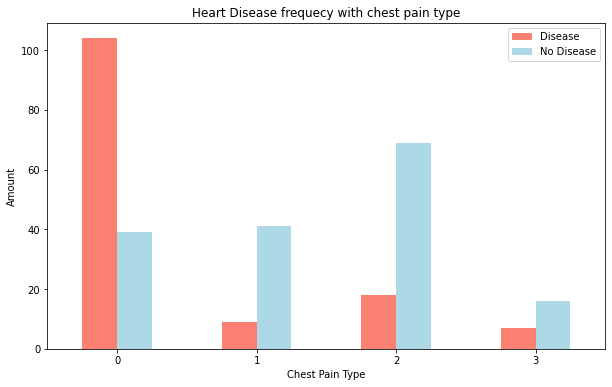

In [25]:
# make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart Disease frequecy with chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Disease','No Disease'])
plt.xticks(rotation=0);

In [26]:
## make  a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

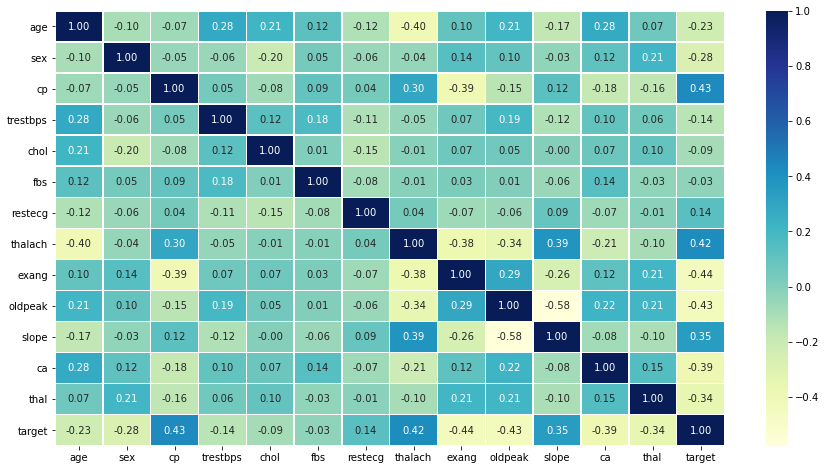

In [27]:
## make more visual
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='0.2f',cmap="YlGnBu")

## 5. Modelling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# split data into x & y
x = df.drop('target',axis=1)
y = df['target']

In [30]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [32]:
# split data into train & test 
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Now we've got our data split into training & test sets, its time to build a mahcine learning model.               
We'll grain it (find the patterns on the training set)                    
And we'll test it (use the patterns) on the test set.    

We're goint to try 3 different machine learning models
1. Logistic Regression
2. K-Nearest Nieghbours Classifire
3. Random Forest Classifier
4. Decision Tree Classifier
5. Bagging Classifier

In [34]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Bagging": BaggingClassifier()}

# Craete a fuction to fit & score model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluate given machine learning models.
    models: a dict of different ML models
    x_train: traing data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # make a dict to keep model score
    model_scores = {}
    
    # loop through models:
    for name,model in models.items():
        #fit model to the data
        model.fit(x_train,y_train)
        
        #evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [35]:
models_score = fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Decision Tree': 0.8524590163934426,
 'Bagging': 0.8032786885245902}

In [37]:
model_compare = pd.DataFrame(models_score,index=['Accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest,Decision Tree,Bagging
Accuracy,0.885246,0.688525,0.836066,0.852459,0.803279


<AxesSubplot:>

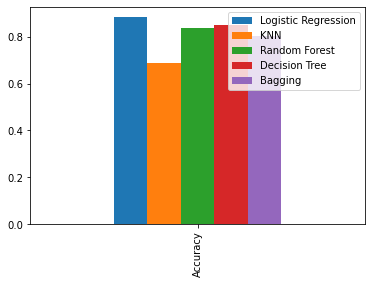

In [38]:
model_compare.plot.bar()

<AxesSubplot:>

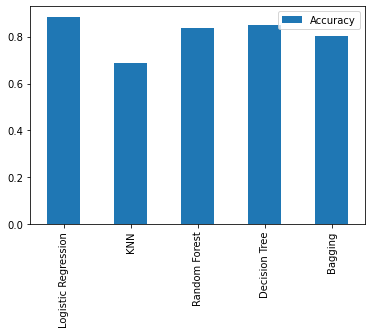

In [39]:
model_compare.T.plot.bar()

Now we've got a Baseline model.........And we know model's firts predictions aren't always what we should based our next step off. What should do?

Lets look at the following:
* Hyperparameter Tunning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Pricion
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the Curve (AUC) 

### HyperParamer Tunning [By Hand]

In [40]:
# Let's Tune KNN
train_scores = []
test_scores = []

# Create list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the ALgorithm
    knn.fit(x_train, y_train)
    
    # Update the trainning score list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update test score list
    test_scores.append(knn.score(x_test,y_test))


In [41]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data: 75.41%


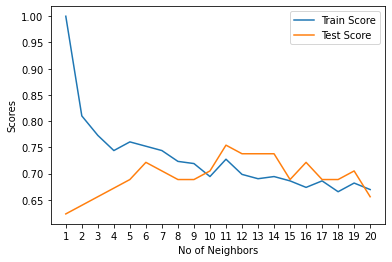

In [43]:
plt.plot(neighbors,train_scores, label='Train Score')
plt.plot(neighbors,test_scores, label= 'Test Score')
plt.xlabel('No of Neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Scores')
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tunning By RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier
.... using RandomizedSearchCV

In [44]:
# Craete a hyperparameter grid [dict] for for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":['liblinear']}

# Craete a hyperparameter grid [dict] for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, Lets tune them using RandomizedSearchCV...

In [45]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20, verbose= True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RandomForestClassifier()


In [48]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                n_iter=20, verbose= True)

# Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameters Tunning with GridSearchCV


In [50]:
# Different Hyperparameters for our LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":['liblinear']}

# Setup hyparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [53]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Decision Tree': 0.8524590163934426,
 'Bagging': 0.8032786885245902}

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8032786885245902

In [55]:
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc.score(x_test,y_test)

0.819672131147541

## Evaluate our tuned ML model , beyond accuracy
* ROC Curve AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score
    
.... it would be great if cross validation was used where possible. 

To make Comparisions and Evaluate our trained model, first we need to make predictions

In [56]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

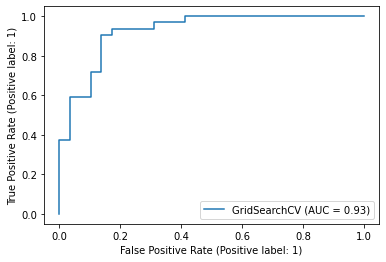

In [58]:
# Plot ROC curve & Calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)


In [59]:
# Confusion metric
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [60]:
sns.set(font_scale=1.5)

def Plot_Conf_Mat(y_test,y_preds):
    """""
    Plots a nice looking Confusion Matrix using Seaborn's Heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

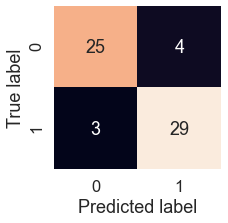

In [61]:
Plot_Conf_Mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, lets get a classification report as well as cross-validated precision, recall & f1-score

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrics using cross-validation
we are going to calculate accuracy, precision, recall and f1-score of our model using cross validation and to do so we'll be using `cross_val_score()`

In [63]:
#Check best hyperparametrs
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')


In [65]:
# Cross validated accuracy
cv_acc= cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [66]:
# Cross Validated precision
cv_precion= cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precion = cv_precion.mean()
cv_precion

0.8207936507936507

In [67]:
# Cross Validated Recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [68]:
# Cross Validated F1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = cv_f1 .mean()
cv_f1

0.8673007976269721

In [69]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precisio":cv_precion,
                           "Recall":cv_recall,
                           "F1":cv_f1},index=[0])

In [70]:
cv_metrics

,Accuracy,Precisio,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


<AxesSubplot:>

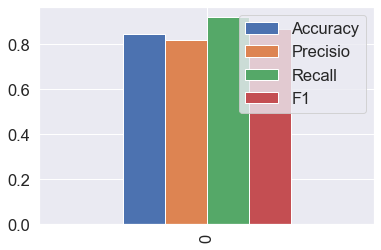

In [71]:
cv_metrics.plot.bar()

<AxesSubplot:title={'center':'Cross-validated Classification Metrics'}>

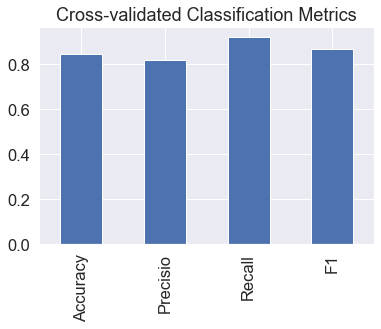

In [72]:
cv_metrics.T.plot.bar(title='Cross-validated Classification Metrics',legend=False)

## Feature Importance
It is another way of asking "which features contributed most to the outcomes of the model and how did they contributed?"


Finding feature Importance is different for each ML model. One way find feature importance is to google search for it (by model name)

Let's find feature importance for our LogisticRegression model...

In [73]:
# fit an instance of LogisticRegression
gs_log_reg.best_params_



{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [77]:
## match coef's features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [78]:
## visualise feature imprtance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


<AxesSubplot:>

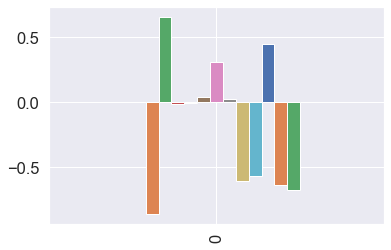

In [79]:
feature_df.plot.bar(legend=False)

<AxesSubplot:title={'center':'Feature Importance'}>

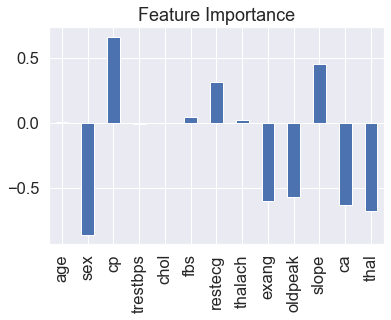

In [80]:
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [81]:
pd.crosstab(df["sex"], df["target"])


target,0,1
sex,,
0,24,72
1,114,93


In [82]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
